___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [4]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print('You can safely ignore this.')

You can safely ignore this.


In [5]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [7]:
import tensorflow as tf
SEED = 42
tf.keras.utils.set_random_seed(SEED)
import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [8]:
df0=pd.read_csv('Churn_Modelling.csv')
df0.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [9]:
df0.shape

(10000, 14)

In [10]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df0.duplicated().sum()

0

In [80]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [12]:
df0.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
df=df0.drop(columns=['RowNumber','CustomerId', 'Surname'])

In [83]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [84]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

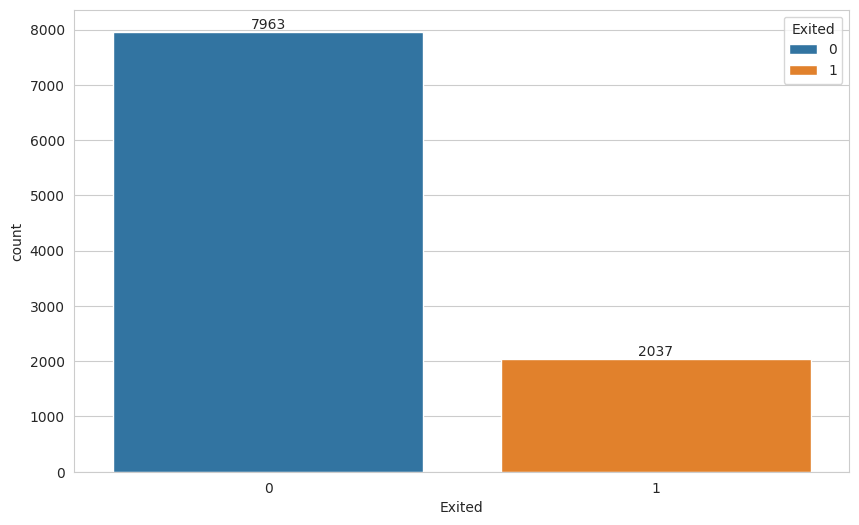

In [85]:
ax=sns.countplot(x=df['Exited'], hue=df['Exited'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

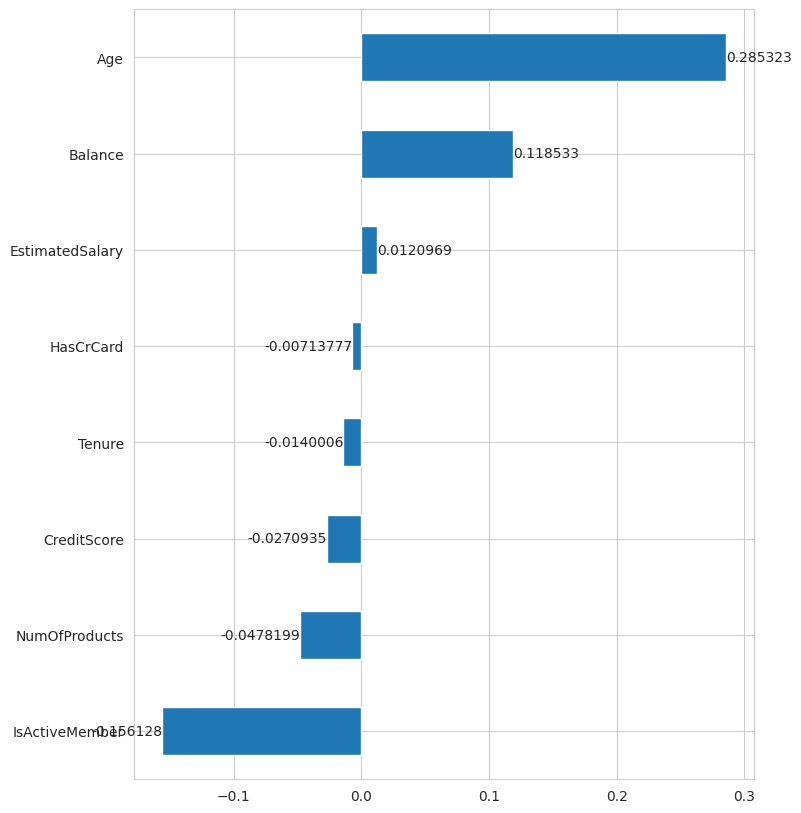

In [86]:
plt.figure(figsize=(8, 10))
ax = df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0])
plt.show()

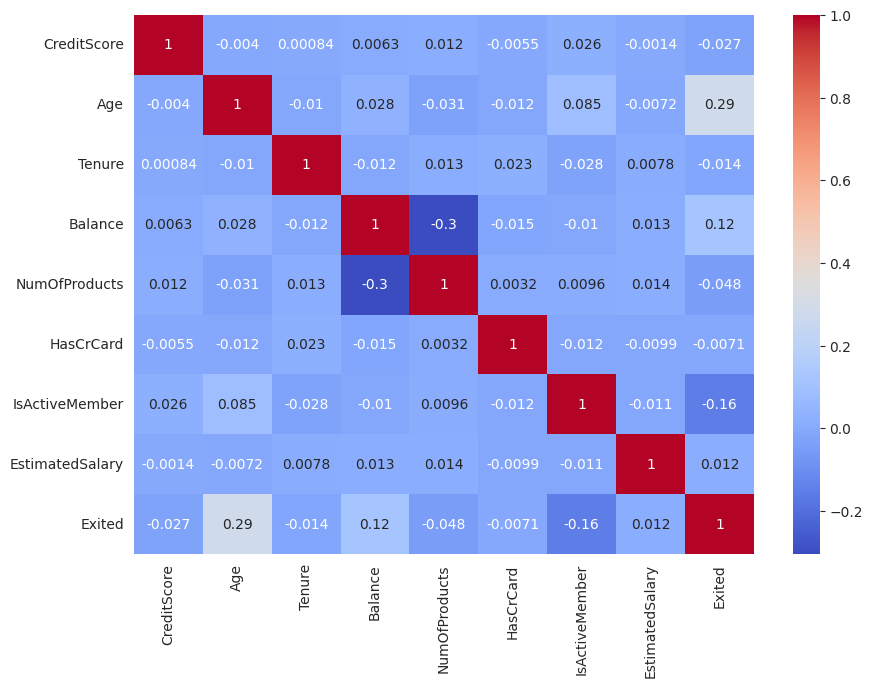

In [87]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="coolwarm");

In [88]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [89]:
df.groupby(df['Geography'])['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

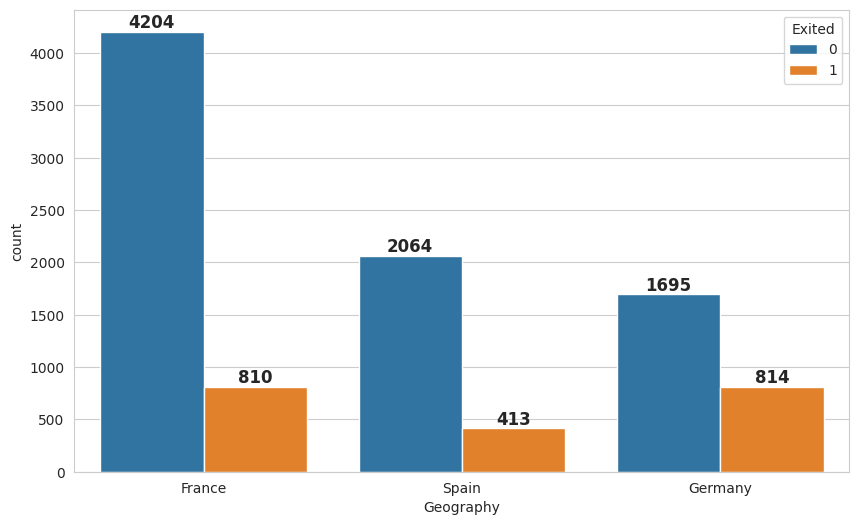

In [90]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Geography', data = df, hue = 'Exited')
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

In [91]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [92]:
df.groupby(df['Gender'])['Exited'].value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

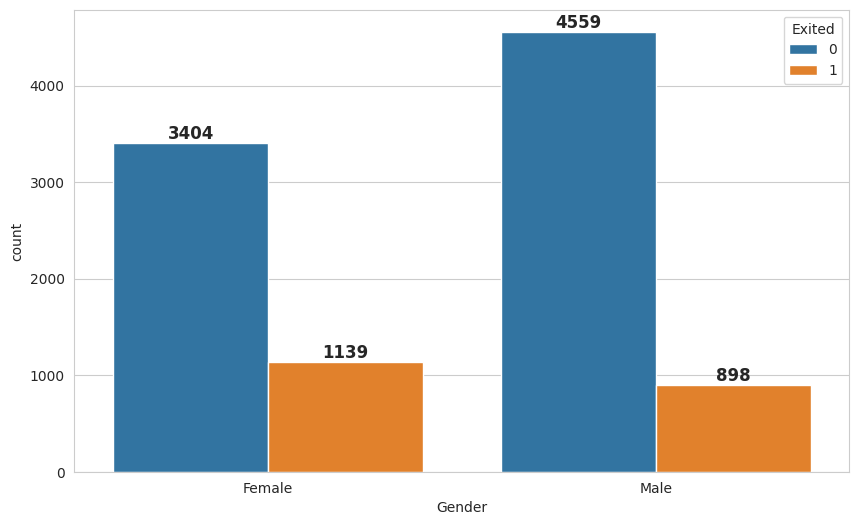

In [93]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Gender', data = df, hue = 'Exited')
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

In [94]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [95]:
df.groupby(df['HasCrCard'])['Exited'].value_counts()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: Exited, dtype: int64

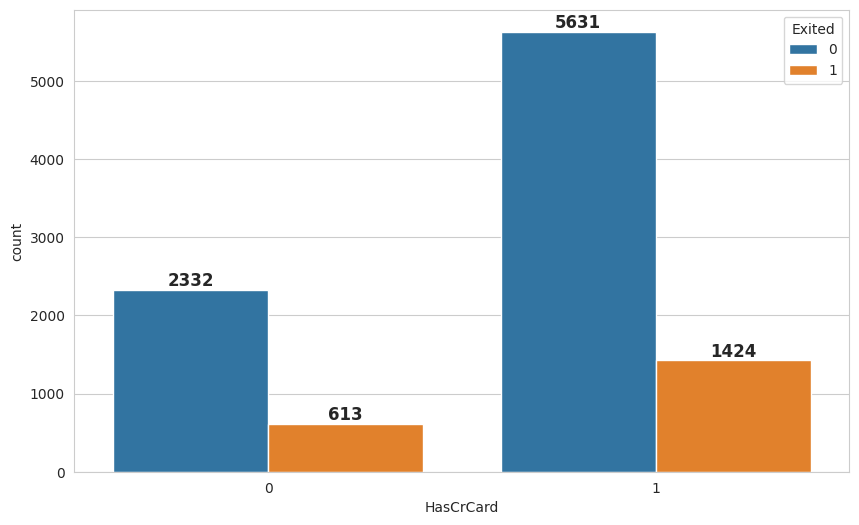

In [96]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='HasCrCard', data = df, hue = 'Exited')
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

In [97]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

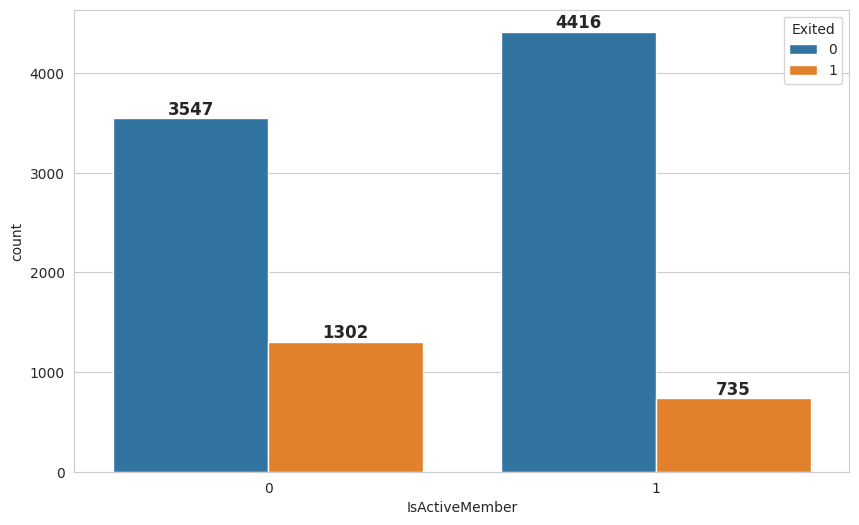

In [98]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='IsActiveMember', data = df, hue = 'Exited')
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

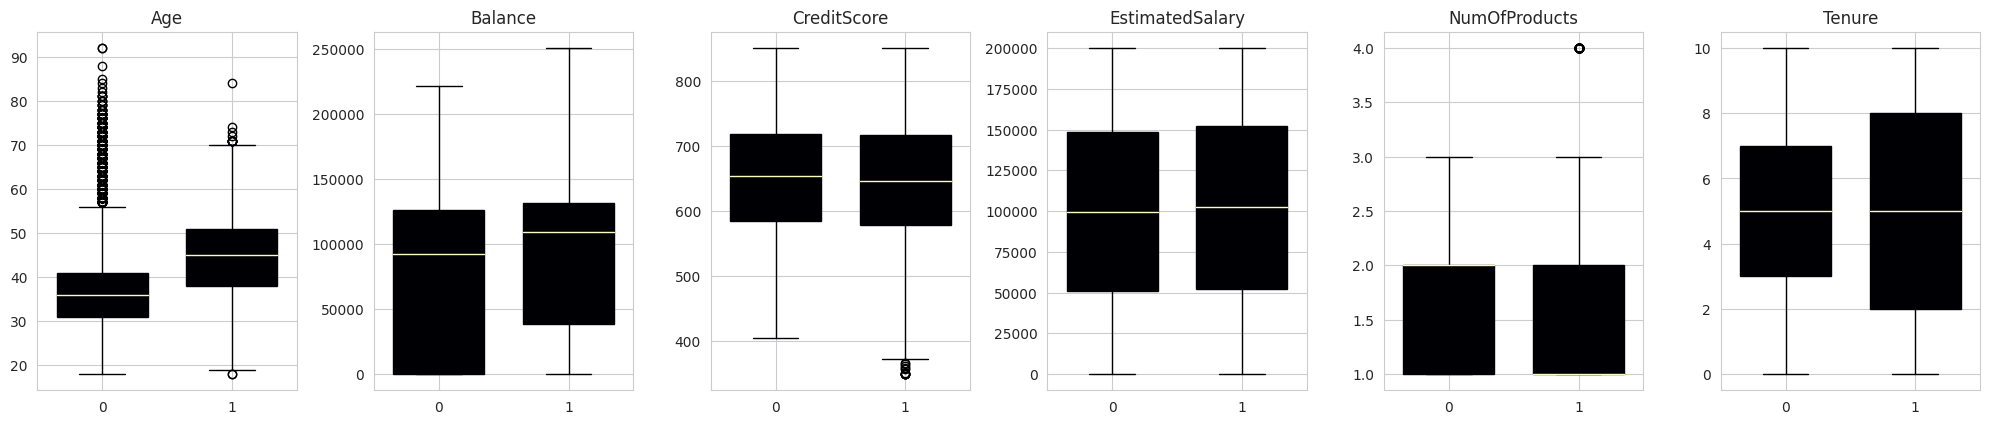

In [99]:
df[['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'NumOfProducts', 'Tenure', 'Exited']].plot(kind="box",
                                                                                         by='Exited',
                                                                                         layout=(5, 6),
                                                                                         subplots=True,
                                                                                         widths=0.7,
                                                                                         figsize=(20, 20),
                                                                                         cmap="magma",
                                                                                         patch_artist=True)
plt.tight_layout()


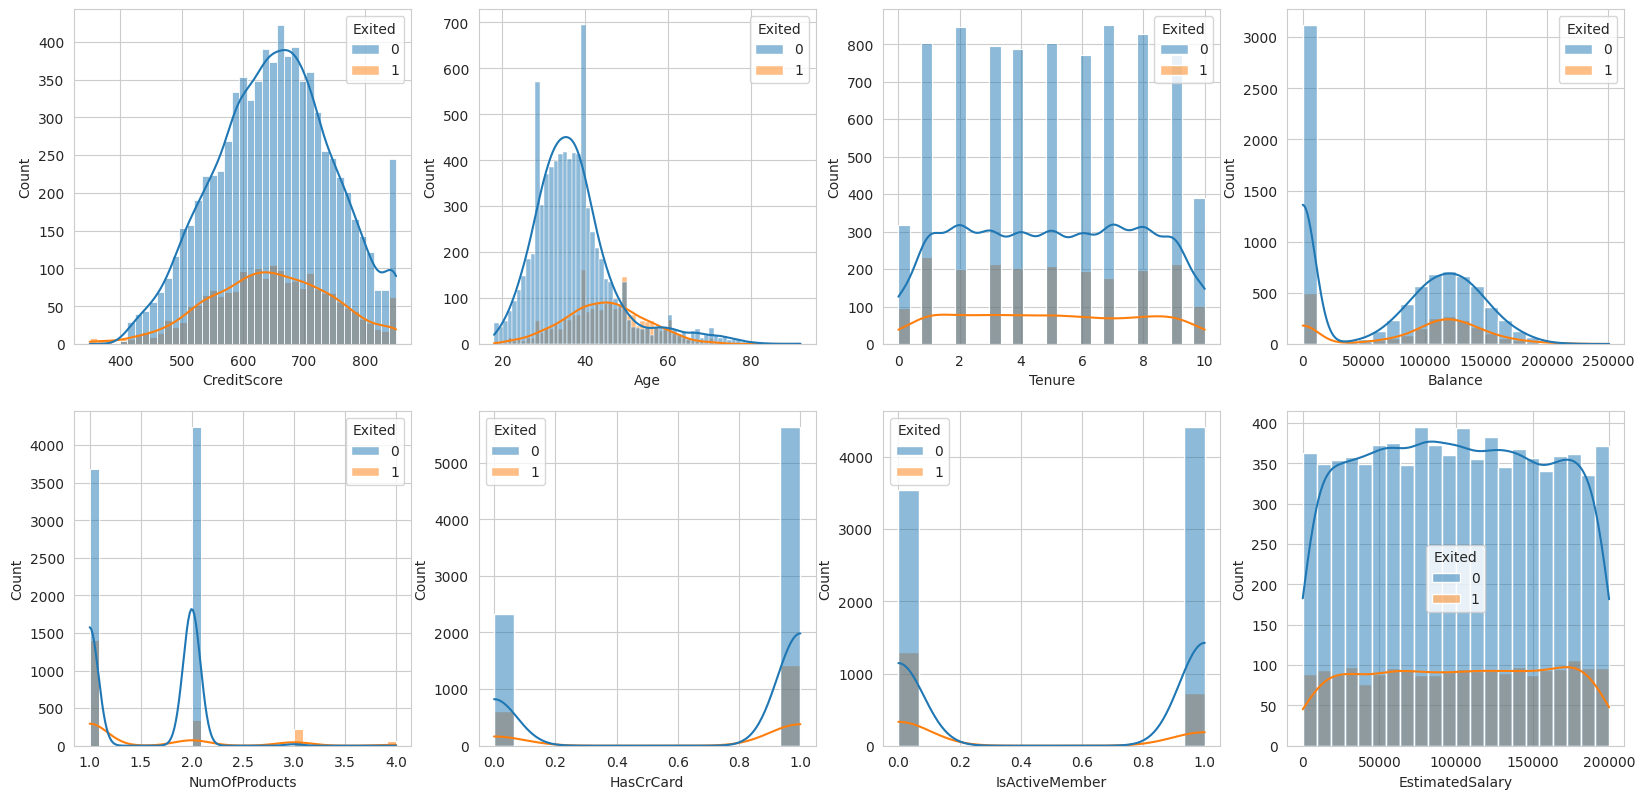

In [100]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include="number").columns[:-1]):
    plt.subplot(4,4, idx+1)
    sns.histplot(data=df, x=col,
                 hue="Exited", kde=True)

# Preprocessing of Data
- Train | Test Split, Scalling

In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [16]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [17]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000,1,1,1,101348.880
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580
2,502,France,Female,42,8,159660.800,3,1,0,113931.570
3,699,France,Female,39,1,0.000,2,0,0,93826.630
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100


In [18]:
X_ohe = enc.fit_transform(X[['Geography', 'Gender']])

In [19]:
X_num = X.select_dtypes(include='number')

In [20]:
X = pd.concat([X_ohe,X_num], axis=1)

In [21]:
X.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.000,0.000,0.000,1.000,0.000,619,42,2,0.000,1,1,1,101348.880
1,0.000,0.000,1.000,1.000,0.000,608,41,1,83807.860,1,0,1,112542.580
2,1.000,0.000,0.000,1.000,0.000,502,42,8,159660.800,3,1,0,113931.570
3,1.000,0.000,0.000,1.000,0.000,699,39,1,0.000,2,0,0,93826.630
4,0.000,0.000,1.000,1.000,0.000,850,43,2,125510.820,1,1,1,79084.100


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.20,
    random_state=SEED
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    stratify=y_train,
    test_size=0.20,
    random_state=SEED )

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

In [2]:
batch_size = 128

In [25]:
# Set the random seed for reproducibility
tf.random.set_seed(SEED)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))

# Add the second dense layer with 18 units and ReLU activation
model.add(Dense(16, activation="relu"))

# Add the third dense layer with 9 units and ReLU activation
model.add(Dense(8, activation="relu"))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid")) # dense 2 alip softmax kullanabiliriz, 1 ve 0 icin ayri ayri probability gösterir ama islem yükü olur.

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(
    monitor="val_loss",
    mode="min",
    verbose=1,
    patience=10,
    restore_best_weights=True)

In [31]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=300,
    verbose=1,
    #callbacks=[early_stop]
    )

Epoch 1/300
50/50 [==============================] - 0s 5ms/step - loss: 0.3414 - recall: 0.4525 - val_loss: 0.3575 - val_recall: 0.4080
Epoch 2/300
50/50 [==============================] - 0s 5ms/step - loss: 0.3409 - recall: 0.4532 - val_loss: 0.3572 - val_recall: 0.4264
Epoch 3/300
50/50 [==============================] - 0s 4ms/step - loss: 0.3407 - recall: 0.4440 - val_loss: 0.3572 - val_recall: 0.4294
Epoch 4/300
50/50 [==============================] - 0s 5ms/step - loss: 0.3398 - recall: 0.4594 - val_loss: 0.3544 - val_recall: 0.4233
Epoch 5/300
50/50 [==============================] - 0s 4ms/step - loss: 0.3385 - recall: 0.4571 - val_loss: 0.3584 - val_recall: 0.3926
Epoch 6/300
50/50 [==============================] - 0s 5ms/step - loss: 0.3403 - recall: 0.4609 - val_loss: 0.3566 - val_recall: 0.3926
Epoch 7/300
50/50 [==============================] - 0s 5ms/step - loss: 0.3379 - recall: 0.4601 - val_loss: 0.3560 - val_recall: 0.4080
Epoch 8/300
50/50 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.341,0.452,0.358,0.408
1,0.341,0.453,0.357,0.426
2,0.341,0.444,0.357,0.429
3,0.340,0.459,0.354,0.423
4,0.339,0.457,0.358,0.393


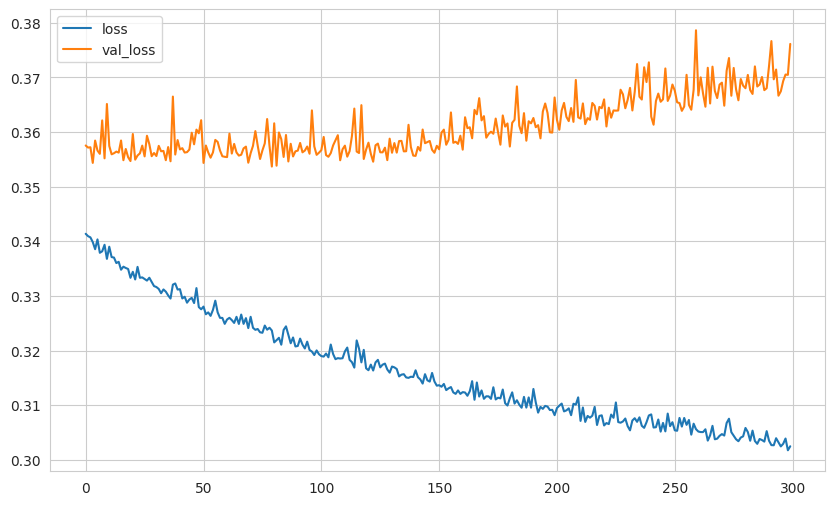

In [34]:
loss_df[["loss","val_loss"]].plot()
plt.show()

In [35]:
model.evaluate(X_test, y_test, verbose=0)

[0.36463841795921326, 0.5282555222511292]

In [36]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.36463841795921326
Recall:  0.5282555222511292


In [37]:
y_pred = model.predict(X_test, verbose=0)
y_pred

array([[0.02129212],
       [0.04940774],
       [0.21529959],
       ...,
       [0.9044197 ],
       [0.01081836],
       [0.08855936]], dtype=float32)

In [38]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1490  103]
 [ 192  215]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.68      0.53      0.59       407

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000



63/63 [==============================] - 0s 1ms/step


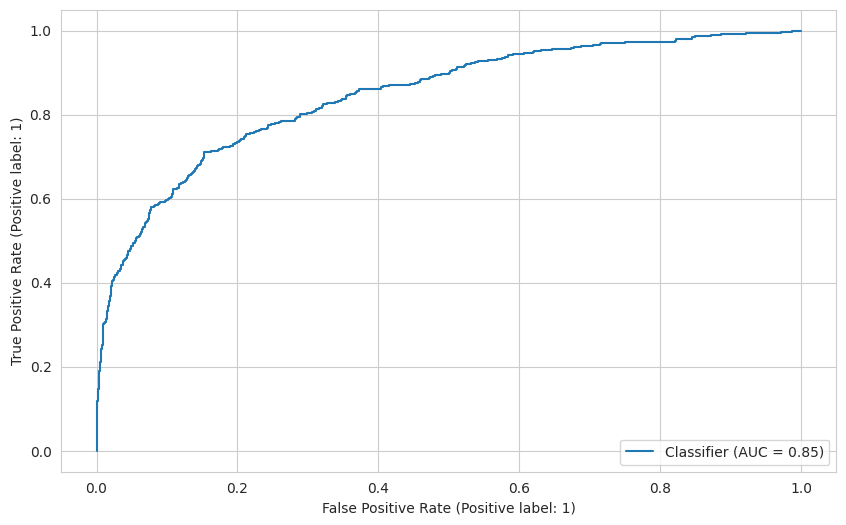

In [39]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [40]:
roc_auc_score(y_test, y_pred_proba)

0.8462098462098462

## **With Early Stopping**

In [42]:
tf.random.set_seed(SEED)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))

# Add the second dense layer with 18 units and ReLU activation
model.add(Dense(16, activation="relu"))

# Add the third dense layer with 9 units and ReLU activation
model.add(Dense(8, activation="relu"))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid")) # dense 2 alip softmax kullanabiliriz, 1 ve 0 icin ayri ayri probability gösterir ama islem yükü olur.

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [43]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=300,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/300
50/50 [==============================] - 2s 9ms/step - loss: 0.5167 - recall: 0.0000e+00 - val_loss: 0.4746 - val_recall: 0.0000e+00
Epoch 2/300
50/50 [==============================] - 0s 4ms/step - loss: 0.4740 - recall: 0.0000e+00 - val_loss: 0.4644 - val_recall: 0.0000e+00
Epoch 3/300
50/50 [==============================] - 0s 5ms/step - loss: 0.4644 - recall: 0.0046 - val_loss: 0.4601 - val_recall: 0.0061
Epoch 4/300
50/50 [==============================] - 0s 6ms/step - loss: 0.4566 - recall: 0.0230 - val_loss: 0.4563 - val_recall: 0.0521
Epoch 5/300
50/50 [==============================] - 0s 4ms/step - loss: 0.4487 - recall: 0.0468 - val_loss: 0.4516 - val_recall: 0.0399
Epoch 6/300
50/50 [==============================] - 0s 5ms/step - loss: 0.4406 - recall: 0.0897 - val_loss: 0.4422 - val_recall: 0.0429
Epoch 7/300
50/50 [==============================] - 0s 5ms/step - loss: 0.4292 - recall: 0.1181 - val_loss: 0.4336 - val_recall: 0.1135
Epoch 8/300
50/50 [======

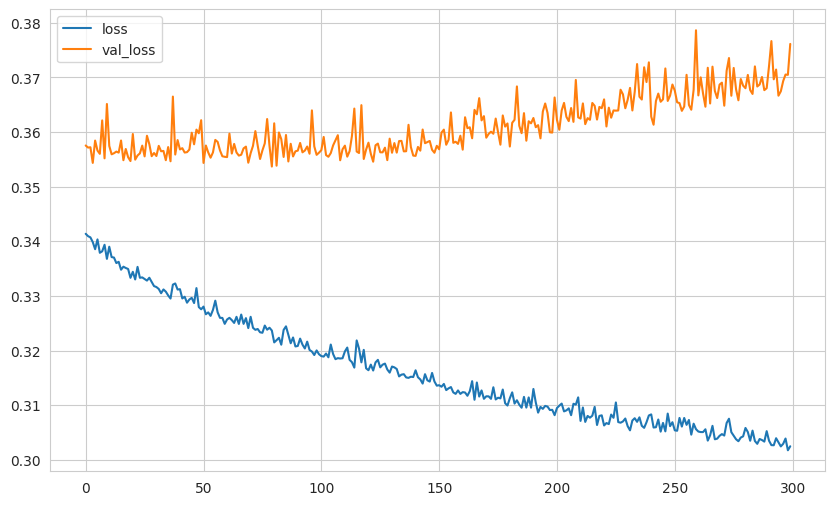

In [44]:
loss_df[["loss","val_loss"]].plot()
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [45]:
tf.random.set_seed(SEED)
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # dense 2 alip softmax kullanabiliriz, 1 ve 0 icin ayri ayri probability gösterir ama islem yükü olur.
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [46]:
early_stop = EarlyStopping(
    monitor="val_loss",
    mode="min",
    verbose=1,
    patience=10,
    restore_best_weights=True)

In [47]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [50]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=300,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights)

Epoch 1/300
50/50 [==============================] - 4s 25ms/step - loss: 0.6887 - recall: 0.2362 - val_loss: 0.6441 - val_recall: 0.5092
Epoch 2/300
50/50 [==============================] - 0s 9ms/step - loss: 0.6640 - recall: 0.5429 - val_loss: 0.6277 - val_recall: 0.6411
Epoch 3/300
50/50 [==============================] - 1s 10ms/step - loss: 0.6368 - recall: 0.6227 - val_loss: 0.6101 - val_recall: 0.6472
Epoch 4/300
50/50 [==============================] - 0s 8ms/step - loss: 0.6182 - recall: 0.6956 - val_loss: 0.6279 - val_recall: 0.6994
Epoch 5/300
50/50 [==============================] - 0s 8ms/step - loss: 0.6063 - recall: 0.7178 - val_loss: 0.5658 - val_recall: 0.5982
Epoch 6/300
50/50 [==============================] - 0s 9ms/step - loss: 0.5988 - recall: 0.7132 - val_loss: 0.5657 - val_recall: 0.6288
Epoch 7/300
50/50 [==============================] - 0s 8ms/step - loss: 0.5855 - recall: 0.7109 - val_loss: 0.5743 - val_recall: 0.6718
Epoch 8/300
50/50 [====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                448       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.689,0.236,0.644,0.509
1,0.664,0.543,0.628,0.641
2,0.637,0.623,0.610,0.647
3,0.618,0.696,0.628,0.699
4,0.606,0.718,0.566,0.598


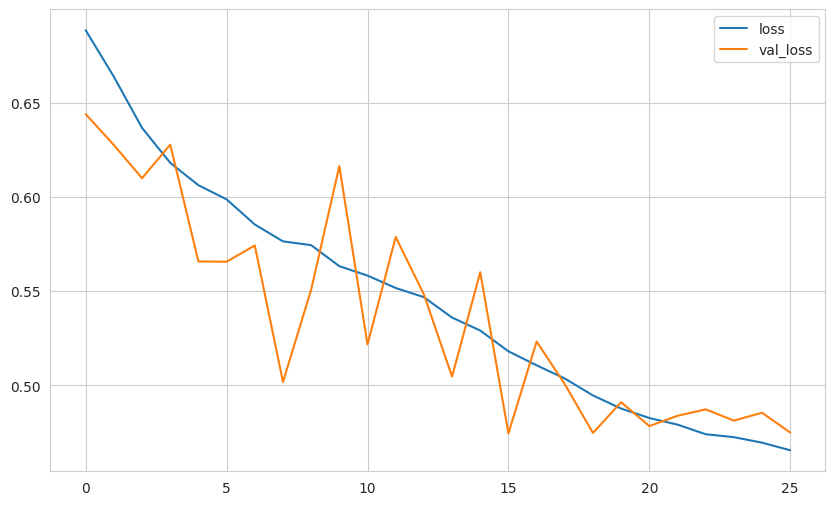

In [53]:
loss_df[["loss","val_loss"]].plot()
plt.show()

In [54]:
model.evaluate(X_test, y_test, verbose=0)

[0.47680196166038513, 0.6560196280479431]

In [55]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.47680196166038513
Recall:  0.6560196280479431


In [56]:
y_pred = model.predict(X_test, verbose=0)
y_pred

array([[0.12536404],
       [0.38761538],
       [0.303737  ],
       ...,
       [0.89376336],
       [0.1294273 ],
       [0.22424161]], dtype=float32)

In [57]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1298  295]
 [ 140  267]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1593
           1       0.48      0.66      0.55       407

    accuracy                           0.78      2000
   macro avg       0.69      0.74      0.70      2000
weighted avg       0.82      0.78      0.79      2000



63/63 [==============================] - 0s 2ms/step


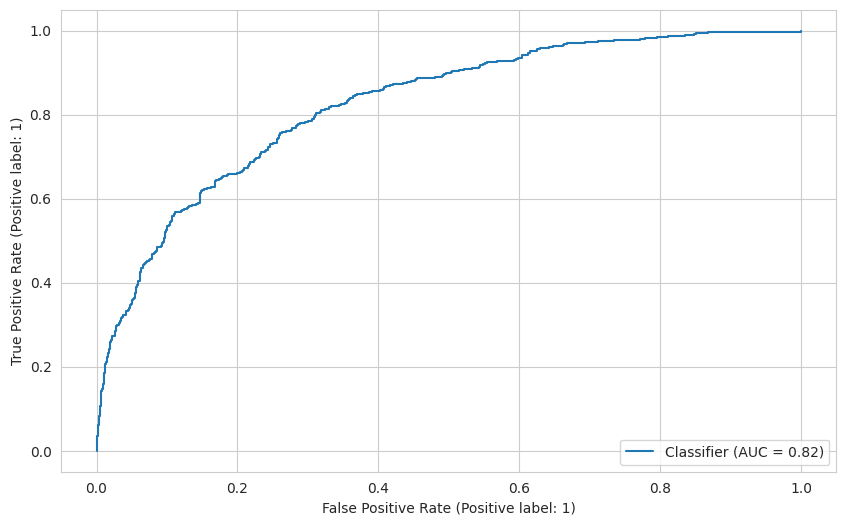

In [58]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [59]:
roc_auc_score(y_test, y_pred_proba)

0.8239040272938578

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [60]:
from tensorflow.keras.optimizers import Adam

In [61]:
tf.random.set_seed(SEED)
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [62]:
early_stop = EarlyStopping(
    monitor="val_loss",
    mode="min",
    verbose=1,
    patience=10,
    restore_best_weights=True)

In [63]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [65]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=300,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights)

Epoch 1/300
50/50 [==============================] - 4s 13ms/step - loss: 0.6492 - recall: 0.6081 - val_loss: 0.6160 - val_recall: 0.6319
Epoch 2/300
50/50 [==============================] - 0s 7ms/step - loss: 0.6013 - recall: 0.7009 - val_loss: 0.5423 - val_recall: 0.6043
Epoch 3/300
50/50 [==============================] - 0s 7ms/step - loss: 0.5795 - recall: 0.6748 - val_loss: 0.5208 - val_recall: 0.5644
Epoch 4/300
50/50 [==============================] - 0s 6ms/step - loss: 0.5533 - recall: 0.7063 - val_loss: 0.5886 - val_recall: 0.7699
Epoch 5/300
50/50 [==============================] - 0s 7ms/step - loss: 0.5316 - recall: 0.7232 - val_loss: 0.5377 - val_recall: 0.7454
Epoch 6/300
50/50 [==============================] - 0s 7ms/step - loss: 0.5077 - recall: 0.7439 - val_loss: 0.4867 - val_recall: 0.7270
Epoch 7/300
50/50 [==============================] - 0s 6ms/step - loss: 0.4956 - recall: 0.7538 - val_loss: 0.4394 - val_recall: 0.6810
Epoch 8/300
50/50 [=====================

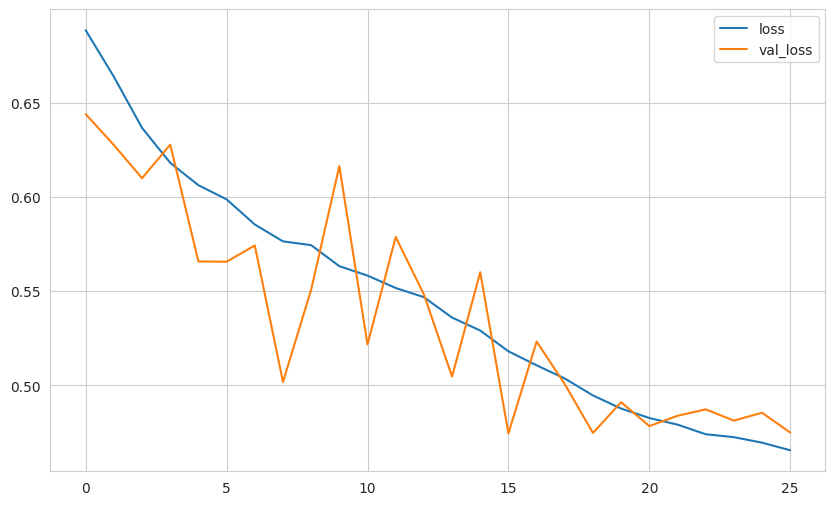

In [66]:
loss_df[["loss","val_loss"]].plot()
plt.show()

In [67]:
model.evaluate(X_test, y_test, verbose=0)

[0.41595956683158875, 0.6707616448402405]

In [68]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.41595956683158875
Recall:  0.6707616448402405


In [69]:
y_pred = model.predict(X_test, verbose=0)
y_pred

array([[0.07657784],
       [0.2290591 ],
       [0.17592907],
       ...,
       [0.94565547],
       [0.05070955],
       [0.1806021 ]], dtype=float32)

In [70]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1349  244]
 [ 134  273]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1593
           1       0.53      0.67      0.59       407

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.73      2000
weighted avg       0.83      0.81      0.82      2000



### Add Dropout Layer

In [71]:
from tensorflow.keras.layers import Dropout

In [72]:
tf.random.set_seed(SEED)
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [73]:
early_stop = EarlyStopping(
    monitor="val_loss",
    mode="min",
    verbose=1,
    patience=10,
    restore_best_weights=True)

In [74]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [76]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=300,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights)

Epoch 1/300
50/50 [==============================] - 4s 9ms/step - loss: 0.7262 - recall: 0.3650 - val_loss: 0.6727 - val_recall: 0.6043
Epoch 2/300
50/50 [==============================] - 0s 4ms/step - loss: 0.6907 - recall: 0.5767 - val_loss: 0.6898 - val_recall: 0.7362
Epoch 3/300
50/50 [==============================] - 0s 4ms/step - loss: 0.6853 - recall: 0.6549 - val_loss: 0.6893 - val_recall: 0.7301
Epoch 4/300
50/50 [==============================] - 0s 5ms/step - loss: 0.6886 - recall: 0.6457 - val_loss: 0.6904 - val_recall: 0.7423
Epoch 5/300
50/50 [==============================] - 0s 4ms/step - loss: 0.6830 - recall: 0.7178 - val_loss: 0.6938 - val_recall: 0.7699
Epoch 6/300
50/50 [==============================] - 0s 5ms/step - loss: 0.6817 - recall: 0.7477 - val_loss: 0.6893 - val_recall: 0.7239
Epoch 7/300
50/50 [==============================] - 0s 5ms/step - loss: 0.6734 - recall: 0.7400 - val_loss: 0.6839 - val_recall: 0.6933
Epoch 8/300
50/50 [======================

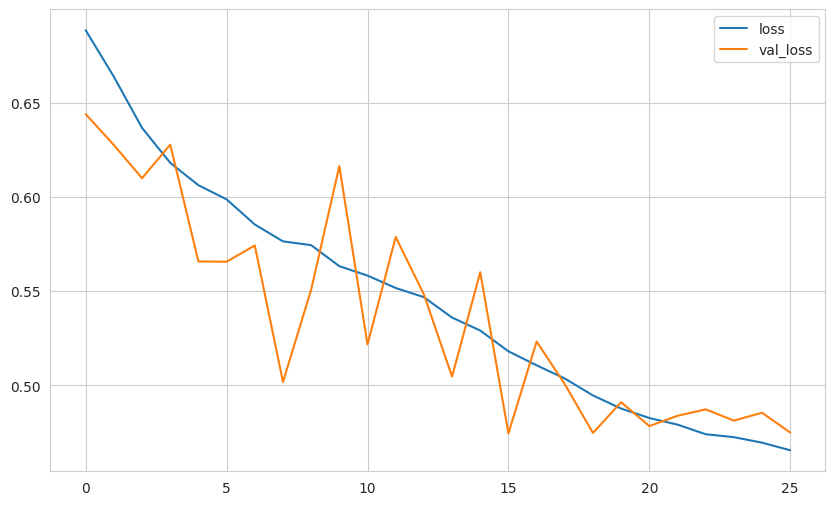

In [77]:
loss_df[["loss","val_loss"]].plot()
plt.show()

In [78]:
model.evaluate(X_test, y_test, verbose=0)

[0.51100093126297, 0.6732186675071716]

In [79]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.51100093126297
Recall:  0.6732186675071716


In [80]:
y_pred = model.predict(X_test, verbose=0)
y_pred

array([[0.2759606 ],
       [0.5034761 ],
       [0.3688775 ],
       ...,
       [0.8116089 ],
       [0.26571098],
       [0.36432108]], dtype=float32)

In [81]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1290  303]
 [ 133  274]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1593
           1       0.47      0.67      0.56       407

    accuracy                           0.78      2000
   macro avg       0.69      0.74      0.71      2000
weighted avg       0.82      0.78      0.79      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

In [82]:
tf.random.set_seed(SEED)
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # dense 2 alip softmax kullanabiliriz, 1 ve 0 icin ayri ayri probability gösterir ama islem yükü olur.
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [83]:
early_stop = EarlyStopping(
    monitor="val_recall",
    mode="max",
    verbose=1,
    patience=10,
    restore_best_weights=True)

In [84]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [85]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=300,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights)

Epoch 1/300
50/50 [==============================] - 3s 12ms/step - loss: 0.6876 - recall: 0.2768 - val_loss: 0.6528 - val_recall: 0.5031
Epoch 2/300
50/50 [==============================] - 0s 5ms/step - loss: 0.6614 - recall: 0.5575 - val_loss: 0.6519 - val_recall: 0.6288
Epoch 3/300
50/50 [==============================] - 0s 4ms/step - loss: 0.6337 - recall: 0.6242 - val_loss: 0.6314 - val_recall: 0.6411
Epoch 4/300
50/50 [==============================] - 0s 4ms/step - loss: 0.6199 - recall: 0.6610 - val_loss: 0.6425 - val_recall: 0.6687
Epoch 5/300
50/50 [==============================] - 0s 4ms/step - loss: 0.6107 - recall: 0.6817 - val_loss: 0.5820 - val_recall: 0.5951
Epoch 6/300
50/50 [==============================] - 0s 5ms/step - loss: 0.6041 - recall: 0.6787 - val_loss: 0.5852 - val_recall: 0.6043
Epoch 7/300
50/50 [==============================] - 0s 4ms/step - loss: 0.5945 - recall: 0.6894 - val_loss: 0.5933 - val_recall: 0.6380
Epoch 8/300
50/50 [=====================

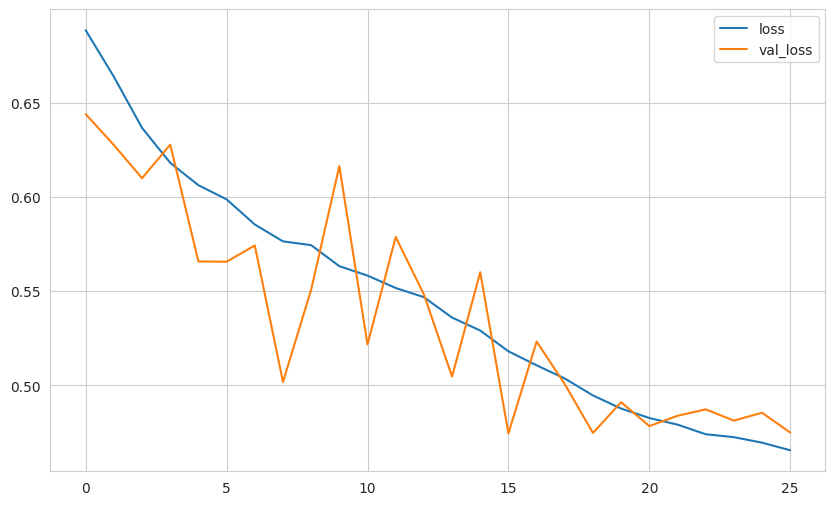

In [86]:
loss_df[["loss","val_loss"]].plot()
plt.show()

In [87]:
model.evaluate(X_test, y_test, verbose=0)

[0.643815815448761, 0.7911548018455505]

In [88]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.643815815448761
Recall:  0.7911548018455505


In [89]:
y_pred = model.predict(X_test, verbose=0)
y_pred

array([[0.3795221 ],
       [0.68475753],
       [0.3904768 ],
       ...,
       [0.88963825],
       [0.40939227],
       [0.43058038]], dtype=float32)

In [90]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[942 651]
 [ 85 322]]
              precision    recall  f1-score   support

           0       0.92      0.59      0.72      1593
           1       0.33      0.79      0.47       407

    accuracy                           0.63      2000
   macro avg       0.62      0.69      0.59      2000
weighted avg       0.80      0.63      0.67      2000



## Optuna

In [92]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.4 MB/s eta 0:00:00


In [93]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [94]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True
)

In [95]:
tf.random.set_seed(SEED)
trial_metric = "Recall"

def create_model(trial):
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1.3e-1, log=True)

    # Create a Sequential model
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model  # Return the created model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_float("w0", 0.01, 5)
    w1 = trial.suggest_float("w1", 0.01, 5)

    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=200,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_val, y_val, verbose=0)[1]
    return score

In [96]:
study = optuna.create_study(direction="maximize")

study.optimize(objective, n_trials=10)

study.best_params

[I 2024-04-03 13:15:22,104] A new study created in memory with name: no-name-11e0f35d-ea08-4cb8-8de9-7af7203f2d49
[I 2024-04-03 13:16:05,221] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 39, 'n_units2': 84, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.006614736019193157, 'w0': 3.6962035877527777, 'w1': 3.548734711217057}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 24.
Epoch 34: early stopping


[I 2024-04-03 13:16:13,042] Trial 1 finished with value: 0.42944785952568054 and parameters: {'n_units1': 30, 'n_units2': 72, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.019379489316411078, 'w0': 2.983725039680142, 'w1': 2.97643742394822}. Best is trial 1 with value: 0.42944785952568054.


Restoring model weights from the end of the best epoch: 8.
Epoch 18: early stopping


[I 2024-04-03 13:16:17,861] Trial 2 finished with value: 0.9478527903556824 and parameters: {'n_units1': 25, 'n_units2': 106, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.01433120216644122, 'w0': 0.01686957109424898, 'w1': 0.4015512646403582}. Best is trial 2 with value: 0.9478527903556824.
[I 2024-04-03 13:16:57,129] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 94, 'n_units2': 84, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.002433545726847112, 'w0': 2.2198370343292795, 'w1': 2.645719624632543}. Best is trial 2 with value: 0.9478527903556824.


Restoring model weights from the end of the best epoch: 18.
Epoch 28: early stopping


[I 2024-04-03 13:17:04,918] Trial 4 finished with value: 0.43558281660079956 and parameters: {'n_units1': 89, 'n_units2': 101, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0031547663179410795, 'w0': 1.9175904586987371, 'w1': 2.080830968857102}. Best is trial 2 with value: 0.9478527903556824.


Restoring model weights from the end of the best epoch: 87.
Epoch 97: early stopping


[I 2024-04-03 13:17:27,573] Trial 5 finished with value: 0.38957056403160095 and parameters: {'n_units1': 88, 'n_units2': 86, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00022355210981695307, 'w0': 4.696320085142492, 'w1': 3.5004047761126103}. Best is trial 2 with value: 0.9478527903556824.
[I 2024-04-03 13:18:09,539] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 46, 'n_units2': 41, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0022742512236303587, 'w0': 0.6041197406912572, 'w1': 0.794252898601273}. Best is trial 2 with value: 0.9478527903556824.


Restoring model weights from the end of the best epoch: 52.
Epoch 62: early stopping


[I 2024-04-03 13:18:22,572] Trial 7 finished with value: 0.4447852671146393 and parameters: {'n_units1': 15, 'n_units2': 88, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06690560399053168, 'w0': 3.930912135599005, 'w1': 2.843384330297551}. Best is trial 2 with value: 0.9478527903556824.
[I 2024-04-03 13:19:01,407] Trial 8 finished with value: 0.3619631826877594 and parameters: {'n_units1': 111, 'n_units2': 70, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 1.2328378185574282e-05, 'w0': 4.680733905987453, 'w1': 2.263922747806946}. Best is trial 2 with value: 0.9478527903556824.
[I 2024-04-03 13:19:41,018] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 32, 'n_units2': 24, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0035791766066364636, 'w0': 4.4670557777591045, 'w1': 3.413031048425788}. Best is trial 2 with value: 0.9478527903556824.


{'n_units1': 25,
 'n_units2': 106,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.01433120216644122,
 'w0': 0.01686957109424898,
 'w1': 0.4015512646403582}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [97]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=200,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/200
50/50 [==============================] - 1s 8ms/step - loss: 0.4876 - recall: 0.0100 - val_loss: 0.4628 - val_recall: 0.0000e+00
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 0.4474 - recall: 0.0552 - val_loss: 0.4340 - val_recall: 0.1166
Epoch 3/200
50/50 [==============================] - 0s 4ms/step - loss: 0.4304 - recall: 0.2170 - val_loss: 0.4300 - val_recall: 0.3497
Epoch 4/200
50/50 [==============================] - 0s 5ms/step - loss: 0.4186 - recall: 0.2853 - val_loss: 0.4117 - val_recall: 0.3282
Epoch 5/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3901 - recall: 0.3275 - val_loss: 0.3892 - val_recall: 0.4294
Epoch 6/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3602 - recall: 0.4057 - val_loss: 0.3709 - val_recall: 0.3589
Epoch 7/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3555 - recall: 0.4110 - val_loss: 0.3608 - val_recall: 0.4049
Epoch 8/200
50/50 [==================

In [98]:
history = model.history.history

<Axes: >

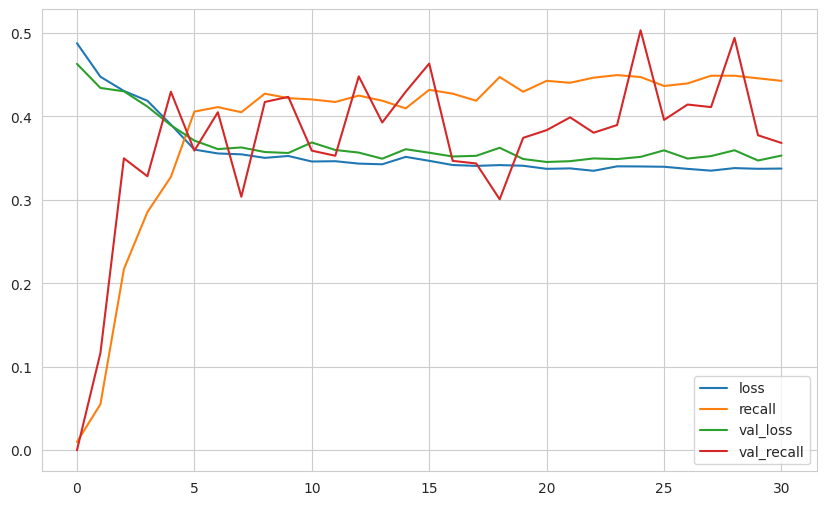

In [99]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [100]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1558   35]
 [ 243  164]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.82      0.40      0.54       407

    accuracy                           0.86      2000
   macro avg       0.84      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



63/63 [==============================] - 0s 1ms/step


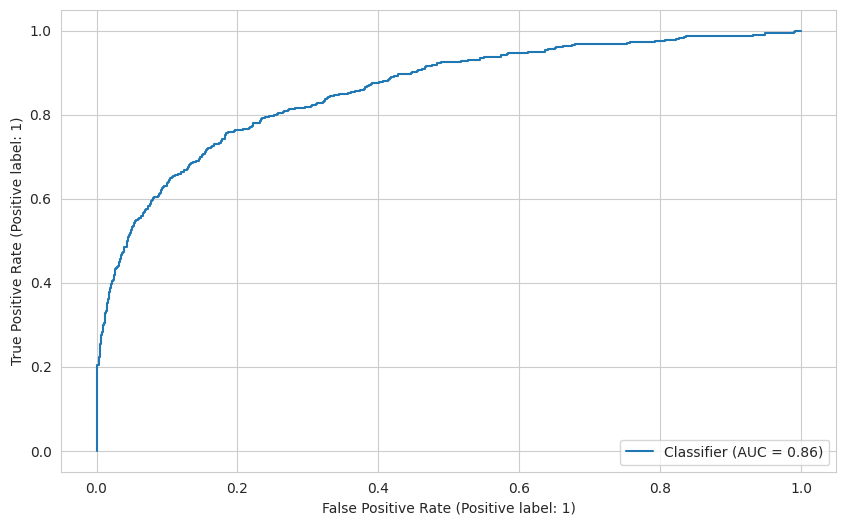

In [101]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [102]:
roc_auc_score(y_test, y_pred_proba)

0.8577313831551119

In [104]:
!pip install scikit-plot


63/63 [==============================] - 0s 2ms/step


IndexError: index 1 is out of bounds for axis 1 with size 1

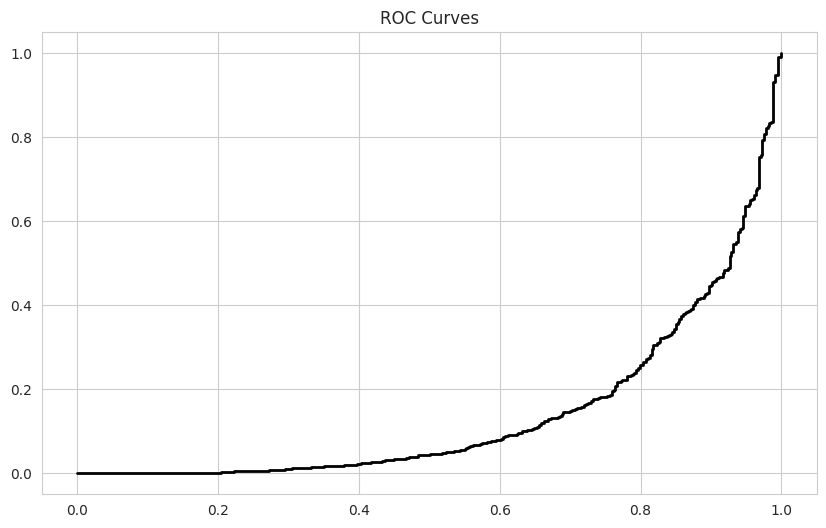

In [105]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_proba = model.predict(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

# Final Model and Model Deployment

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=SEED
)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=200,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/200
63/63 [==============================] - 3s 13ms/step - loss: 0.4714 - recall: 0.0252 - val_loss: 0.4394 - val_recall: 0.2086
Epoch 2/200
63/63 [==============================] - 0s 7ms/step - loss: 0.4288 - recall: 0.2331 - val_loss: 0.4150 - val_recall: 0.1994
Epoch 3/200
63/63 [==============================] - 0s 7ms/step - loss: 0.4000 - recall: 0.3258 - val_loss: 0.3993 - val_recall: 0.2638
Epoch 4/200
63/63 [==============================] - 0s 6ms/step - loss: 0.3828 - recall: 0.3607 - val_loss: 0.3787 - val_recall: 0.2178
Epoch 5/200
63/63 [==============================] - 0s 6ms/step - loss: 0.3693 - recall: 0.3871 - val_loss: 0.3609 - val_recall: 0.2699
Epoch 6/200
63/63 [==============================] - 0s 5ms/step - loss: 0.3604 - recall: 0.4147 - val_loss: 0.3521 - val_recall: 0.4417
Epoch 7/200
63/63 [==============================] - 0s 5ms/step - loss: 0.3560 - recall: 0.4184 - val_loss: 0.3524 - val_recall: 0.4294
Epoch 8/200
63/63 [=====================

In [109]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1533   60]
 [ 211  196]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.48      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [110]:
import pickle

pickle.dump(scaler, open("scaler_exited", "wb"))

In [111]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.33887815475463867
Recall:  0.4815724790096283


In [112]:
model.save("model_exited.h5")

In [113]:
from tensorflow.keras.models import load_model

In [114]:
model_exited = load_model("model_exited.h5")
scaler_exited = pickle.load(open("scaler_exited", "rb"))

## Prediction

In [121]:
single_customer = X.iloc[10:11, :]
single_customer

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
10,1.000,0.000,0.000,0.000,1.000,528,31,6,102016.720,2,0,0,80181.120


In [122]:
single_customer = scaler_exited.transform(single_customer)
single_customer

array([[1.        , 0.        , 0.        , 0.        , 1.        ,
        0.356     , 0.17567568, 0.6       , 0.42794481, 0.33333333,
        0.        , 0.        , 0.40088598]])

In [123]:
(model_exited.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 24ms/step


array([[0]], dtype=int32)

In [124]:
df["Exited"].iloc[10]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___